# To Understand the Problem Statement :
I have collected this Dataset from which is officially maintained by Jet Propulsion Laboratory of California Institute of Technology which is an organization under NASA. In this Dataset all kinds of Data related to Asteroid is included. This Dataset is publicly available in their website. The Basic Definitions of the Columns have been given below.
Website Link- JPL Small-Body Database Search Engine <br>

# Basic Column Definition :
1. SPK-ID: Object primary SPK-ID <br>
Object ID: Object internal database ID <br>
Object fullname: Object full name/designation <br>
pdes: Object primary designation <br>
name: Object IAU name <br>
NEO: Near-Earth Object (NEO) flag <br>
PHA: Potentially Hazardous Asteroid (PHA) flag <br>
H: Absolute magnitude parameter <br>
Diameter: object diameter (from equivalent sphere) km Unit <br>
Albedo: Geometric albedo <br>
Diameter_sigma: 1-sigma uncertainty in object diameter km Unit <br>
Orbit_id: Orbit solution ID <br>
Epoch: Epoch of osculation in modified Julian day form <br>
Equinox: Equinox of reference frame <br>
e: Eccentricity <br>
a: Semi-major axis au Unit <br>
q: perihelion distance au Unit <br>
i: inclination; angle with respect to x-y ecliptic plane <br>
tp: Time of perihelion passage TDB Unit <br>
moid_ld: Earth Minimum Orbit Intersection Distance au Unit <br>
Lets Start Coding : <br>

Firstly Download the Dataset from Kaggle Platform link here : https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset , then Read the dataset by using read_csv built in function.

# Import Libraries

In [28]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

# Load Dataset

In [29]:
nasa_dataset=pd.read_csv('/content/dataset.csv' , error_bad_lines=False)
nasa_dataset

<ipython-input-29-a55ed3f7150b>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  nasa_dataset=pd.read_csv('/content/dataset.csv' , error_bad_lines=False)
<ipython-input-29-a55ed3f7150b>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  nasa_dataset=pd.read_csv('/content/dataset.csv' , error_bad_lines=False)


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [30]:
# shape
nasa_dataset.shape

(958524, 45)

# Data Preprocessing

In [31]:
# identify the null values
nasa_dataset.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [32]:
# info dataset
nasa_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [33]:
# description
nasa_dataset.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [34]:
# drop the null value columns
nasa_dataset=nasa_dataset.drop(columns=['name' , 'prefix' , 'diameter' , 'albedo' , 'diameter_sigma' ])
nasa_dataset.head()

,id,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.40,JPL 47,2458600.5,58600,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.20,JPL 37,2459000.5,59000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.33,JPL 112,2459000.5,59000,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.00,JPL 35,2458600.5,58600,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.90,JPL 114,2459000.5,59000,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [35]:
# remove the no of rows
nasa_dataset=nasa_dataset.dropna()

# Visulization

<ipython-input-36-5088cf21f7a9>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nasa_dataset.corr() , annot=True)


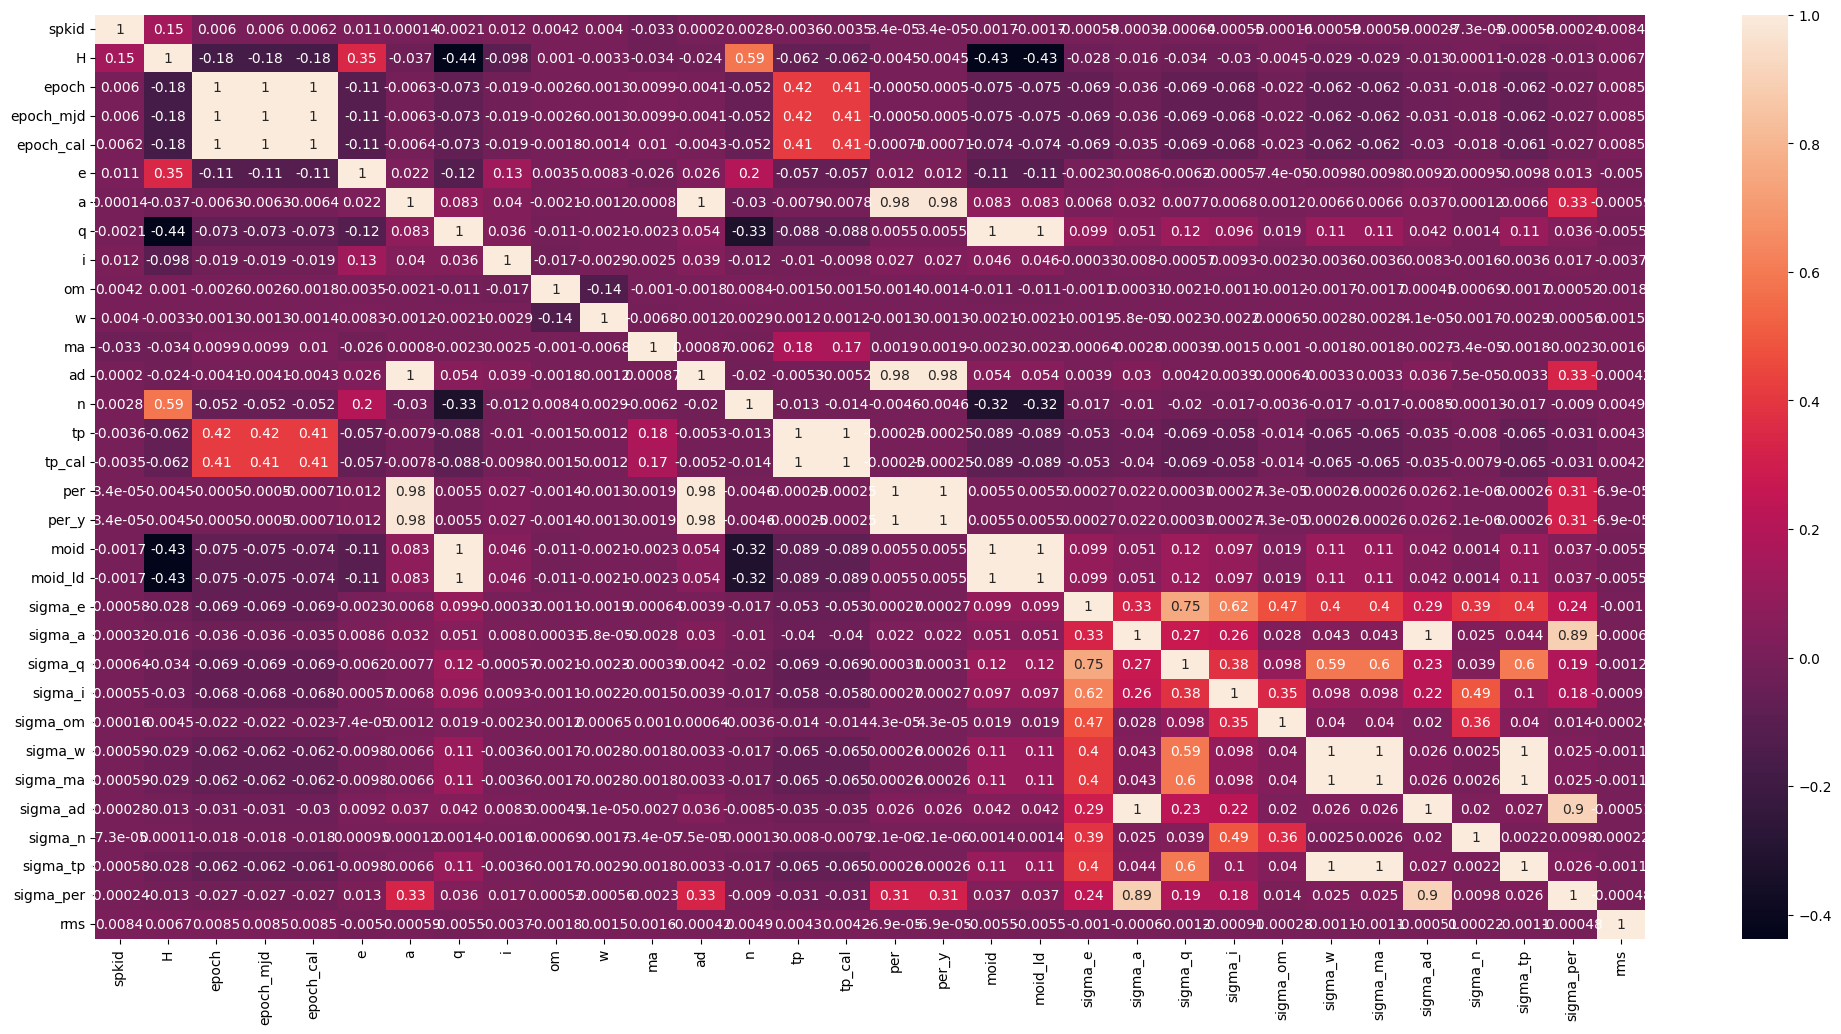

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,12))
sns.heatmap(nasa_dataset.corr() , annot=True)
plt.savefig('heapmap.png')

In [37]:
nasa_dataset.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'neo', 'pha', 'H', 'orbit_id',
       'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om',
       'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [38]:
# Drop the unnecessary columns
nasa_dataset=nasa_dataset.drop(columns=['spkid' , 'pdes' , 'orbit_id' , 'id' , 'equinox'] , axis=1)

In [39]:
nasa_dataset.head()

,full_name,neo,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,1 Ceres,N,N,3.40,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,2 Pallas,N,N,4.20,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,3 Juno,N,N,5.33,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,4 Vesta,N,N,3.00,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,5 Astraea,N,N,6.90,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


# Label Encoder

In [40]:
nasa_dataset['class']=le.fit_transform(nasa_dataset['class'])
nasa_dataset['full_name']=le.fit_transform(nasa_dataset['full_name'])
nasa_dataset['neo']=le.fit_transform(nasa_dataset['neo'])
# nasa_dataset['equinox']=le.fit_transform(nasa_dataset['equinox'])
nasa_dataset['pha']=le.fit_transform(nasa_dataset['pha'])

In [41]:
print(nasa_dataset['class'].unique())
print(nasa_dataset['full_name'].unique())
print(nasa_dataset['neo'].unique())
# print(nasa_dataset['equinox'].unique())
print(nasa_dataset['pha'].unique())

[ 7  9  8  0  6 10  4  1  3  2 11  5]
[387201 387202 387203 ... 387185 387176 387178]
[0 1]
[0 1]


In [42]:

x=nasa_dataset.drop(columns=['pha'] , axis=1)
y=nasa_dataset['pha']

# Feature Engineering

In [43]:
# split the dataset into training and testing
xtrain , xtest , ytrain , ytest=train_test_split(x , y , test_size=0.25)

In [44]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(699251, 34)
(233084, 34)
(699251,)
(233084,)


# Support Vector Machine

In [ ]:
# model building
clf = SVC(kernel='linear')
# model fit
clf.fit(xtrain,ytrain)

In [ ]:
# prediction
y_pred = clf.predict(xtest)
# score
print(accuracy_score(ytest,y_pred))

# Conclusion

The accuracy of training dataset is 99% on support vector machine algorithm.

